In [2]:
from conphar.Pharmacophores import parse_json_pharmacophore, show_pharmacophoric_descriptors, save_pharmacophore_to_pymol, save_pharmacophore_to_json, compute_concensus_pharmacophore, get_ligand_receptor_pharmacophore
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.environ["LC_ALL"] = "C"
os.environ["LANG"] = "C"

ConPhar tools imported successfully


Next cell only works on Linux machines

In [ ]:
receptor_path = "../Data/target/AF-Q13705-ACVR2B_-_prepared.pdb"  # update with your actual receptor file

for file in os.listdir("../Data/other/SDF poses/"):
    if file.endswith(".sdf"):
        ligand_path = f"../Data/other/SDF poses/{file}"
        output_name = os.path.splitext(file)[0]
        out_path = f"../Results/pharmacophores/{output_name}"
        get_ligand_receptor_pharmacophore(receptor=receptor_path, ligand=ligand_path, out=out_path)

From here it works on all machines

In [3]:
p4_table=pd.DataFrame()
for file in os.listdir('./Results/pharmacophores/no_cluster'):
    if '.json' in file:
        try:
            p4,lig,rec=parse_json_pharmacophore(f"./Results/pharmacophores/no_cluster/{file}")
            p4['ligand']=file.replace('.json','')
            p4_table=pd.concat([p4_table,p4],ignore_index=True)
        except Exception:
            pass

In [4]:
p4_table

,enabled,name,radius,size,svector,vector,x,y,z,color,ligand,cluster,weight,variance
0,True,Aromatic,1.1,6.0,"{'x': 0.2970742844408327, 'y': -0.951079817978...","[{'x': 0.2970742844408327, 'y': -0.95107981797...",-1.3954,0.945467,-12.028183,purple,QWQ_7A21,NaN,NaN,NaN
1,True,Aromatic,1.1,6.0,"{'x': 0.3442435949426682, 'y': 0.8915390962183...","[{'x': 0.3442435949426682, 'y': 0.891539096218...",-9.0324,1.428400,-12.199350,purple,QWQ_7A21,NaN,NaN,NaN
2,True,HydrogenAcceptor,0.5,1.0,"{'x': -0.097164024138727, 'y': -0.885561019372...","[{'x': -0.097164024138727, 'y': -0.88556101937...",-5.3695,-1.717800,-13.602700,orange,QWQ_7A21,NaN,NaN,NaN
3,True,HydrogenAcceptor,0.5,1.0,"{'x': 0.7803243896148386, 'y': -0.002877354076...","[{'x': 0.7803243896148384, 'y': -0.00287735407...",-12.3372,1.887100,-11.105900,orange,QWQ_7A21,NaN,NaN,NaN
4,True,HydrogenAcceptor,0.5,1.0,"{'x': 0.9487684392991103, 'y': 0.2077488332775...","[{'x': 0.9487684392991103, 'y': 0.207748833277...",0.6015,1.416600,-13.982000,orange,QWQ_7A21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,True,Hydrophobic,1.0,6.0,NaN,NaN,-9.1961,1.901917,-12.182183,green,U0C_8C7W,NaN,NaN,NaN
449,True,Hydrophobic,1.0,1.0,NaN,NaN,-0.0127,1.186000,-15.513200,green,U0C_8C7W,NaN,NaN,NaN
450,True,Hydrophobic,1.0,1.0,NaN,NaN,2.1022,0.830600,-11.068900,green,U0C_8C7W,NaN,NaN,NaN
451,True,Hydrophobic,1.0,1.0,NaN,NaN,-1.9322,1.826100,-8.531500,green,U0C_8C7W,NaN,NaN,NaN


In [5]:
# rename colors
p4_table['color'] = p4_table['color'].replace({
    'navy': 'blue',
    'white': 'yellow',
})
p4_table = p4_table[~p4_table['name'].isin(['NegativeIon', 'PositiveIon'])]
p4_table

,enabled,name,radius,size,svector,vector,x,y,z,color,ligand,cluster,weight,variance
0,True,Aromatic,1.1,6.0,"{'x': 0.2970742844408327, 'y': -0.951079817978...","[{'x': 0.2970742844408327, 'y': -0.95107981797...",-1.3954,0.945467,-12.028183,purple,QWQ_7A21,NaN,NaN,NaN
1,True,Aromatic,1.1,6.0,"{'x': 0.3442435949426682, 'y': 0.8915390962183...","[{'x': 0.3442435949426682, 'y': 0.891539096218...",-9.0324,1.428400,-12.199350,purple,QWQ_7A21,NaN,NaN,NaN
2,True,HydrogenAcceptor,0.5,1.0,"{'x': -0.097164024138727, 'y': -0.885561019372...","[{'x': -0.097164024138727, 'y': -0.88556101937...",-5.3695,-1.717800,-13.602700,orange,QWQ_7A21,NaN,NaN,NaN
3,True,HydrogenAcceptor,0.5,1.0,"{'x': 0.7803243896148386, 'y': -0.002877354076...","[{'x': 0.7803243896148384, 'y': -0.00287735407...",-12.3372,1.887100,-11.105900,orange,QWQ_7A21,NaN,NaN,NaN
4,True,HydrogenAcceptor,0.5,1.0,"{'x': 0.9487684392991103, 'y': 0.2077488332775...","[{'x': 0.9487684392991103, 'y': 0.207748833277...",0.6015,1.416600,-13.982000,orange,QWQ_7A21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,True,Hydrophobic,1.0,6.0,NaN,NaN,-9.1961,1.901917,-12.182183,green,U0C_8C7W,NaN,NaN,NaN
449,True,Hydrophobic,1.0,1.0,NaN,NaN,-0.0127,1.186000,-15.513200,green,U0C_8C7W,NaN,NaN,NaN
450,True,Hydrophobic,1.0,1.0,NaN,NaN,2.1022,0.830600,-11.068900,green,U0C_8C7W,NaN,NaN,NaN
451,True,Hydrophobic,1.0,1.0,NaN,NaN,-1.9322,1.826100,-8.531500,green,U0C_8C7W,NaN,NaN,NaN


In [6]:
# print sum of "Aromatic" in name column of p4_table
p4_table['name'].value_counts()

name
HydrogenAcceptor    183
Hydrophobic         155
Aromatic             57
HydrogenDonor        53
Name: count, dtype: int64

In [14]:
os.makedirs(f'./Results/pharmacophores/no_cluster/consensus', exist_ok=True)
save_pharmacophore_to_pymol(p4_table,out_file=f'./Results/pharmacophores/no_cluster/consensus/all_features.pse')
save_pharmacophore_to_json(p4_table,out_file=f'./Results/pharmacophores/no_cluster/consensus/all_features.json')

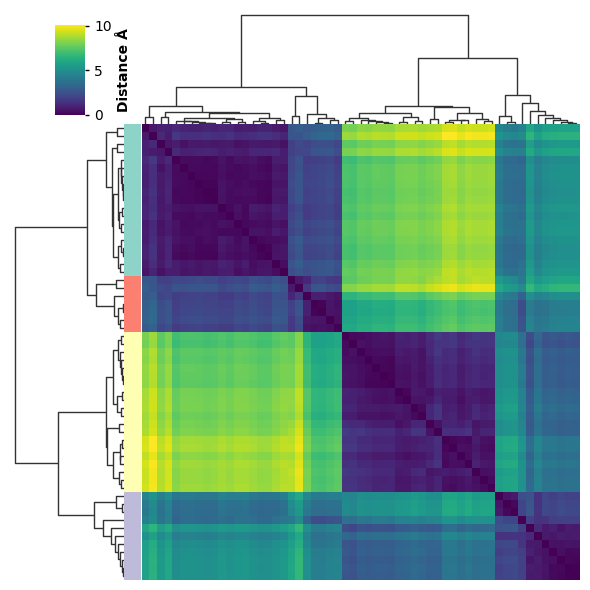

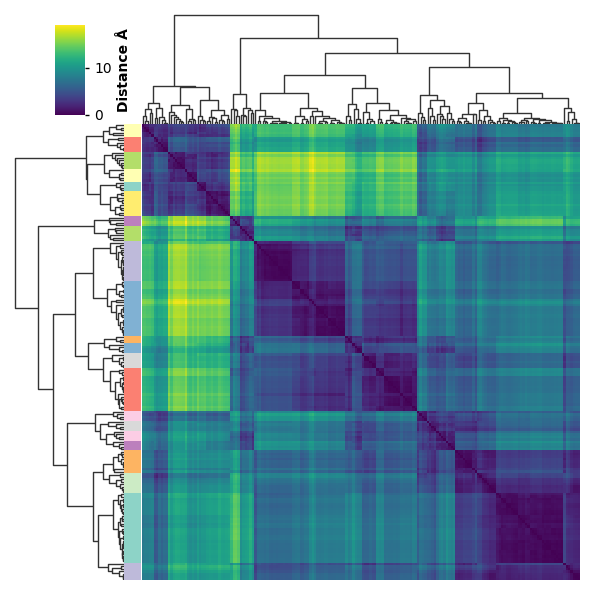

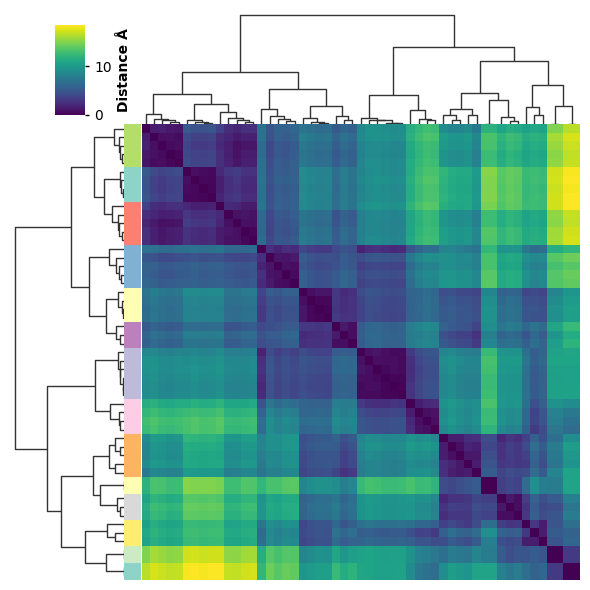

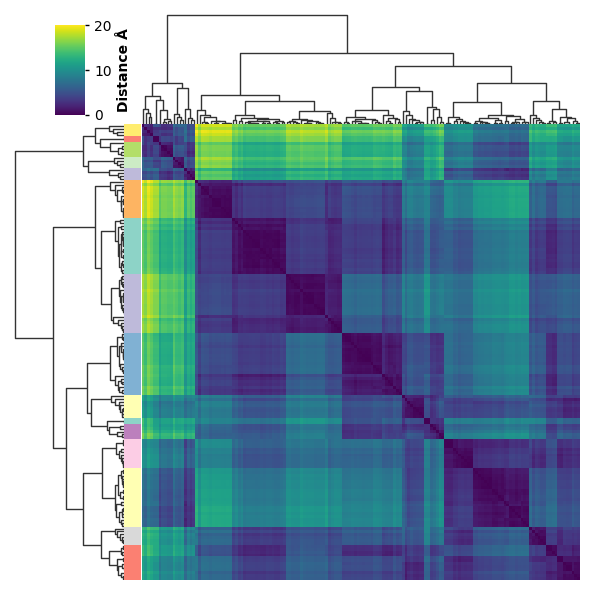

In [8]:
concensus,links=compute_concensus_pharmacophore(p4_table,save_data_per_descriptor=True,out_folder=f'./Results/pharmacophores/no_cluster/consensus',cmap_plots="viridis", h_dist=3,)

In [9]:
concensus['cluster'] = concensus['cluster'].astype(int)
concensus

,name,cluster,x,y,z,radius,color,weight,variance
1,Aromatic,1,-1.200897,0.972004,-12.147008,1.659493,purple,19.0,2.312174e-01
2,Aromatic,2,-2.257797,1.601382,-10.462417,2.231315,purple,7.0,9.215359e-01
3,Aromatic,3,-9.372832,1.516350,-12.401112,1.576198,purple,20.0,3.995640e-01
4,Aromatic,4,-5.682583,0.200341,-12.923415,2.036549,purple,11.0,1.162160e+00
5,HydrogenAcceptor,1,-12.303950,2.238100,-12.367475,1.863071,orange,5.0,1.147732e+00
6,HydrogenAcceptor,2,-10.011360,2.020820,-12.421420,2.116345,orange,6.0,9.639578e-01
7,HydrogenAcceptor,3,-15.138600,2.494933,-10.802783,1.729113,orange,7.0,6.232955e-01
8,HydrogenAcceptor,4,-14.321800,0.770600,-10.940550,2.348911,orange,5.0,1.001237e+00
9,HydrogenAcceptor,5,-13.770133,3.826000,-13.493300,1.334503,orange,4.0,3.227974e-01
10,HydrogenAcceptor,6,-13.460089,4.717489,-10.777989,1.959581,orange,10.0,7.193527e-01


In [ ]:
concensus.to_csv(f'../Results/pharmacophores/sub_models/consensus_weights.csv', index=False)

In [6]:
#remove all rows where weight < 2
concensus_test = concensus[concensus['weight'] >= 2]
len(concensus_test)

4

In [27]:
save_pharmacophore_to_pymol(concensus,out_file=f'./Results/pharmacophores/no_cluster/consensus/consensus.pse',
select='concensus')
save_pharmacophore_to_json(concensus,out_file=f'./Results/pharmacophores/no_cluster/consensus/consensus.json')

manually make Weight dependant coloring

In [10]:
total_compounds = len(p4_table['ligand'].unique())
print(total_compounds)

weighting_list = concensus
weighting_list['frequency'] = weighting_list['weight'] / total_compounds


weighting_list.to_csv('Results/pharmacophores/no_cluster/consensus/no_clusters.csv')

32


In [29]:
# print the top 4 best clusters based on normalized_frequency for each name
top_indices = weighting_list.groupby('name')['frequency'].nlargest(4).reset_index(level=0, drop=True).index
top_clusters = weighting_list.loc[top_indices]
top_clusters = top_clusters.sort_values(by='name')
top_clusters

,name,cluster,x,y,z,radius,color,weight,variance,frequency
3,Aromatic,3,-9.372832,1.516350,-12.401112,1.576198,purple,19.0,0.420594,0.612903
1,Aromatic,1,-1.200897,0.972004,-12.147008,1.659493,purple,18.0,0.244063,0.580645
4,Aromatic,4,-5.682583,0.200341,-12.923415,2.036549,purple,10.0,1.278376,0.322581
2,Aromatic,2,-2.257797,1.601382,-10.462417,2.231315,purple,6.0,1.075125,0.193548
25,HydrogenAcceptor,21,-5.328574,-1.617000,-14.000426,1.518501,orange,27.0,0.234803,0.870968
14,HydrogenAcceptor,10,1.355500,1.563700,-11.668276,2.349405,orange,21.0,0.771887,0.677419
18,HydrogenAcceptor,14,-0.341144,2.010375,-9.419706,2.222372,orange,16.0,0.750425,0.516129
13,HydrogenAcceptor,9,0.547273,1.228673,-14.151013,2.323811,orange,15.0,0.409948,0.483871
33,HydrogenDonor,7,-7.517980,-0.585460,-13.890680,1.072566,yellow,5.0,0.171525,0.161290
27,HydrogenDonor,1,-13.387625,5.308750,-11.041400,1.522629,yellow,4.0,0.453574,0.129032


In [33]:
import pymol2
from IPython.display import Image
import tempfile

# --- PyMOL visual for each descriptor ---
subset_names = ['Aromatic', 'Hydrophobic', 'HydrogenAcceptor', 'HydrogenDonor']

for name in subset_names:
    subset = weighting_list[weighting_list['name'] == name]
    cmd.reinitialize()

    for idx, row in subset.iterrows():
        atom_name = f"{row['cluster']}_{idx}"
        cmd.pseudoatom(object=atom_name, pos=[row['x'], row['y'], row['z']], vdw=row['radius'], b=row['frequency'], color=row['color'])
        cmd.label(atom_name, f'"{row["cluster"]}"')

    cmd.spectrum("b", palette=f"white {row['color']}", selection="*")
    cmd.group(name, "*")
    cmd.center("all")
    cmd.show("spheres")
    cmd.save(f"./Results/pharmacophores/no_cluster/consensus/{name}_clusters_by_weight.pse")

In [12]:
# Define filters as a dictionary: feature name → list of clusters
filters = {
    'Aromatic': [1,12], #purple
    'Hydrophobic': [10], #green
    'HydrogenAcceptor': [9,6], #orange
    'HydrogenDonor': [2] #yellow
}

# Build a set of valid (name, cluster) pairs
valid_pairs = set()
for name, clusters in filters.items():
    for cluster in clusters:
        valid_pairs.add((name, cluster))

# Filter rows matching any of the (name, cluster) pairs
submodel_df = concensus[[ (row['name'], row['cluster']) in valid_pairs for _, row in concensus.iterrows() ]]

save_pharmacophore_to_json(submodel_df,out_file=f'../Results/pharmacophores/{cluster}/consensus/{cluster}/Submodel_4.json')

FileNotFoundError: [Errno 2] No such file or directory: '../Results/pharmacophores/2/consensus/2/Submodel_4.json'

In [30]:
from pymol import cmd
import pandas as pd
import IPython.display as Image

# Define subsets of the consensus DataFrame
subsets = {
    "Aromatic": weighting_list[weighting_list['name'] == 'Aromatic'],
    "Hydrophobic": weighting_list[weighting_list['name'] == 'Hydrophobic'],
    "HydrogenAcceptor": weighting_list[weighting_list['name'] == 'HydrogenAcceptor'],
    "HydrogenDonor": weighting_list[weighting_list['name'] == 'HydrogenDonor']
}

# Iterate over each subset
for subset_name, subset_data in subsets.items():
    cmd.reinitialize()  # Reset PyMOL session

    # Add pseudoatoms for the current subset
    for index, row in subset_data.iterrows():
        name = row['cluster']
        x, y, z = row['x'], row['y'], row['z']
        radius = row['radius']
        b = row['frequency']
        color = row['color']
        atom_name = f"{name}_{index}"
        cmd.pseudoatom(object=atom_name, pos=[x, y, z], vdw=radius, b=b)
        cmd.label(atom_name, f'"{name}"')

    # Apply coloring based on B-factor
    cmd.spectrum("b", palette=f"white {color}", selection="*")

    # Group everything and save the PyMOL session
    cmd.group(subset_name, '*')
    cmd.center('all')
    cmd.show('spheres')
    cmd.save(f'../Results/pharmacophores/{cluster}/consensus/{subset_name}_clusters_by_weight.pse')
    
    # Take snapshot and show in notebook
    cmd.ray(800, 600)
    img_file = f"/tmp/{subset_name}.png"
    cmd.png(img_file)
    Image(filename='/tmp/view.png')

FileNotFoundError: [Errno 2] No such file or directory: '../Results/pharmacophores/no_cluster/consensus/Aromatic_clusters_by_weight.pse'

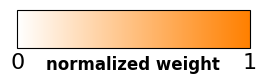

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(3, 1))
fig.subplots_adjust(bottom=0.5)

# Create a colormap from white to purple using RGB values
cmap = mpl.colors.LinearSegmentedColormap.from_list('white_blue', ['white', (1, 0.5, 0)])

# Create a colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')

# Set the ticks to only 0 and 100
cb1.set_ticks([0,1])

# Remove other ticks and labels
cb1.ax.tick_params(axis='x', which='both', length=0, labelsize=16)  # Enlarge and bold tick numbers

# Enlarge and bold the label
cb1.set_label('normalized weight', fontsize=12, fontweight='bold',labelpad=-12)

# Remove background color
cb1.ax.set_facecolor('none')

# Save the figure to a PNG file
plt.savefig('../Results/images/color keys/color_key_orange.png', transparent=True, bbox_inches='tight', pad_inches=0.1)

plt.show()


In [31]:
import pymol2
from IPython.display import Image
import tempfile

def Weighted_cluster_coloring(label_pos=[0,0,9], label_size=18, bg_color='white', visible_structure=False):
    with pymol2.PyMOL() as pymol:
        cmd = pymol.cmd
        cmd.load('../Results/pharmacophores/cluster_1/consensus/HydrogenAcceptor_clusters_by_weight.pse')
        
        cmd.load('../Data/target/AF-Q13705-ACVR2B_-_prepared.pdb', 'receptor')
        if visible_structure:
            cmd.show('cartoon', 'receptor')
        else:
            cmd.hide('everything', 'receptor')
        
        cmd.set('cartoon_transparency', 0.7)
        cmd.set('cartoon_color', 'lightpink')

        cmd.set('specular', 0)
        cmd.set('ray_shadows', 0)
        cmd.orient('HydrogenAcceptor')
        cmd.set('label_size', label_size)
        cmd.set('label_position', label_pos)
        cmd.bg_color(bg_color)
        

        img_path = os.path.join(tempfile.gettempdir(), "pymol_out.png")
        cmd.png(img_path, ray=1)
        return Image(img_path)

# Example call
Weighted_cluster_coloring(label_pos=[0, 0, 5], label_size=17, bg_color='white', visible_structure=False)


CmdException:  Error: failed to open file "../Results/pharmacophores/cluster_1/consensus/HydrogenAcceptor_clusters_by_weight.pse"